<a href="https://colab.research.google.com/github/waswapeter/Falls_Lake/blob/main/Peter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import files
uploaded = files.upload()


Saving Falls Lake_Neuse River Basin.csv to Falls Lake_Neuse River Basin (3).csv


In [7]:
print(uploaded)

{'Falls Lake_Neuse River Basin (2).csv': b'datetime,outflow_cfs,inflow_cfs\r\n1/1/2010,3134,918\r\n1/2/2010,3124,494\r\n1/3/2010,3111,185\r\n1/4/2010,3097,123\r\n1/5/2010,1817,765\r\n1/6/2010,681,192\r\n1/7/2010,681,242\r\n1/8/2010,681,571\r\n1/9/2010,680,238\r\n1/10/2010,680,179\r\n1/11/2010,406,288\r\n1/12/2010,211,398\r\n1/13/2010,211,159\r\n1/14/2010,211,272\r\n1/15/2010,192,379\r\n1/16/2010,153,280\r\n1/17/2010,153,4568\r\n1/18/2010,154,4323\r\n1/19/2010,999,1536\r\n1/20/2010,2234,842\r\n1/21/2010,1361,1561\r\n1/22/2010,393,2939\r\n1/23/2010,394,1908\r\n1/24/2010,394,456\r\n1/25/2010,397,12758\r\n1/26/2010,874,4800\r\n1/27/2010,2135,1684\r\n1/28/2010,2251,1424\r\n1/29/2010,1362,904\r\n1/30/2010,1362,1793\r\n1/31/2010,1361,754\r\n2/1/2010,1360,901\r\n2/2/2010,1568,1265\r\n2/3/2010,1988,3237\r\n2/4/2010,1404,3926\r\n2/5/2010,525,9571\r\n2/6/2010,535,18960\r\n2/7/2010,540,4268\r\n2/8/2010,542,1739\r\n2/9/2010,542,1827\r\n2/10/2010,1089,2207\r\n2/11/2010,2128,882\r\n2/12/2010,3340,609

In [27]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Falls Lake_Neuse River Basin (3).csv" with length 89399 bytes


In [32]:
### importing necessary library
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import pandas as pd
plt.rcParams['figure.dpi'] = 600

data = pd.read_csv('Falls Lake_Neuse River Basin.csv', sep=',', index_col=0, parse_dates=True)
#Filter out all February 29 instances
#Data = data.loc[~((data.index.month==2) & (data.index.day==29))]
#print(Data)
Inflow = data["inflow_cfs"];Outflow = data["outflow_cfs"];
#print(Inflow)

In [33]:
##First, we need to organise the data to compute the indicators
def cal_flow_indicators(Inflow):
    # Process date
    Inflow = (
        Inflow
        # Parse the 'datetime' column
        .with_columns(
            pl.col('datetime').str.strptime(pl.Date, "%Y-%m-%d").alias('datetime')
        )
        # Extract 'Year' and 'Day_of_Year'
        .with_columns([
            pl.col('datetime').dt.year().alias('Year'),
            pl.col('datetime').dt.ordinal_day().alias('Day_of_Year')
        ])
        # Filter out February 29th from the dataset
        .filter(pl.col('Day_of_Year') != 60)
        # Calculate 'Water_Year' based on the month of the date
        .with_columns(
            pl.when(pl.col('datetime').dt.month() >= 10)
            .then(pl.col('Year') + 1)
            .otherwise(pl.col('Year'))
            .alias('Water_Year')
        )
    )

In [34]:
def cal_flow_indicators(Outflow):
    # Process date
    Outflow = (
        Outflow
        # Parse the 'datetime' column
        .with_columns(
            pl.col('datetime').str.strptime(pl.Date, "%Y-%m-%d").alias('datetime')
        )
        # Extract 'Year' and 'Day_of_Year'
        .with_columns([
            pl.col('datetime').dt.year().alias('Year'),
            pl.col('datetime').dt.ordinal_day().alias('Day_of_Year')
        ])
        # Filter out February 29th from the dataset
        .filter(pl.col('Day_of_Year') != 60)
        # Calculate 'Water_Year' based on the month of the date
        .with_columns(
            pl.when(pl.col('datetime').dt.month() >= 10)
            .then(pl.col('Year') + 1)
            .otherwise(pl.col('Year'))
            .alias('Water_Year')
        )
    )

datetime
2010-01-01    918.0
2010-01-02    494.0
2010-01-03    185.0
2010-01-04    123.0
2010-01-05    765.0
              ...  
NaT             NaN
NaT             NaN
NaT             NaN
NaT             NaN
NaT             NaN
Name: inflow_cfs, Length: 5018, dtype: float64


Text(0, 0.5, 'Outflows (cfs)')

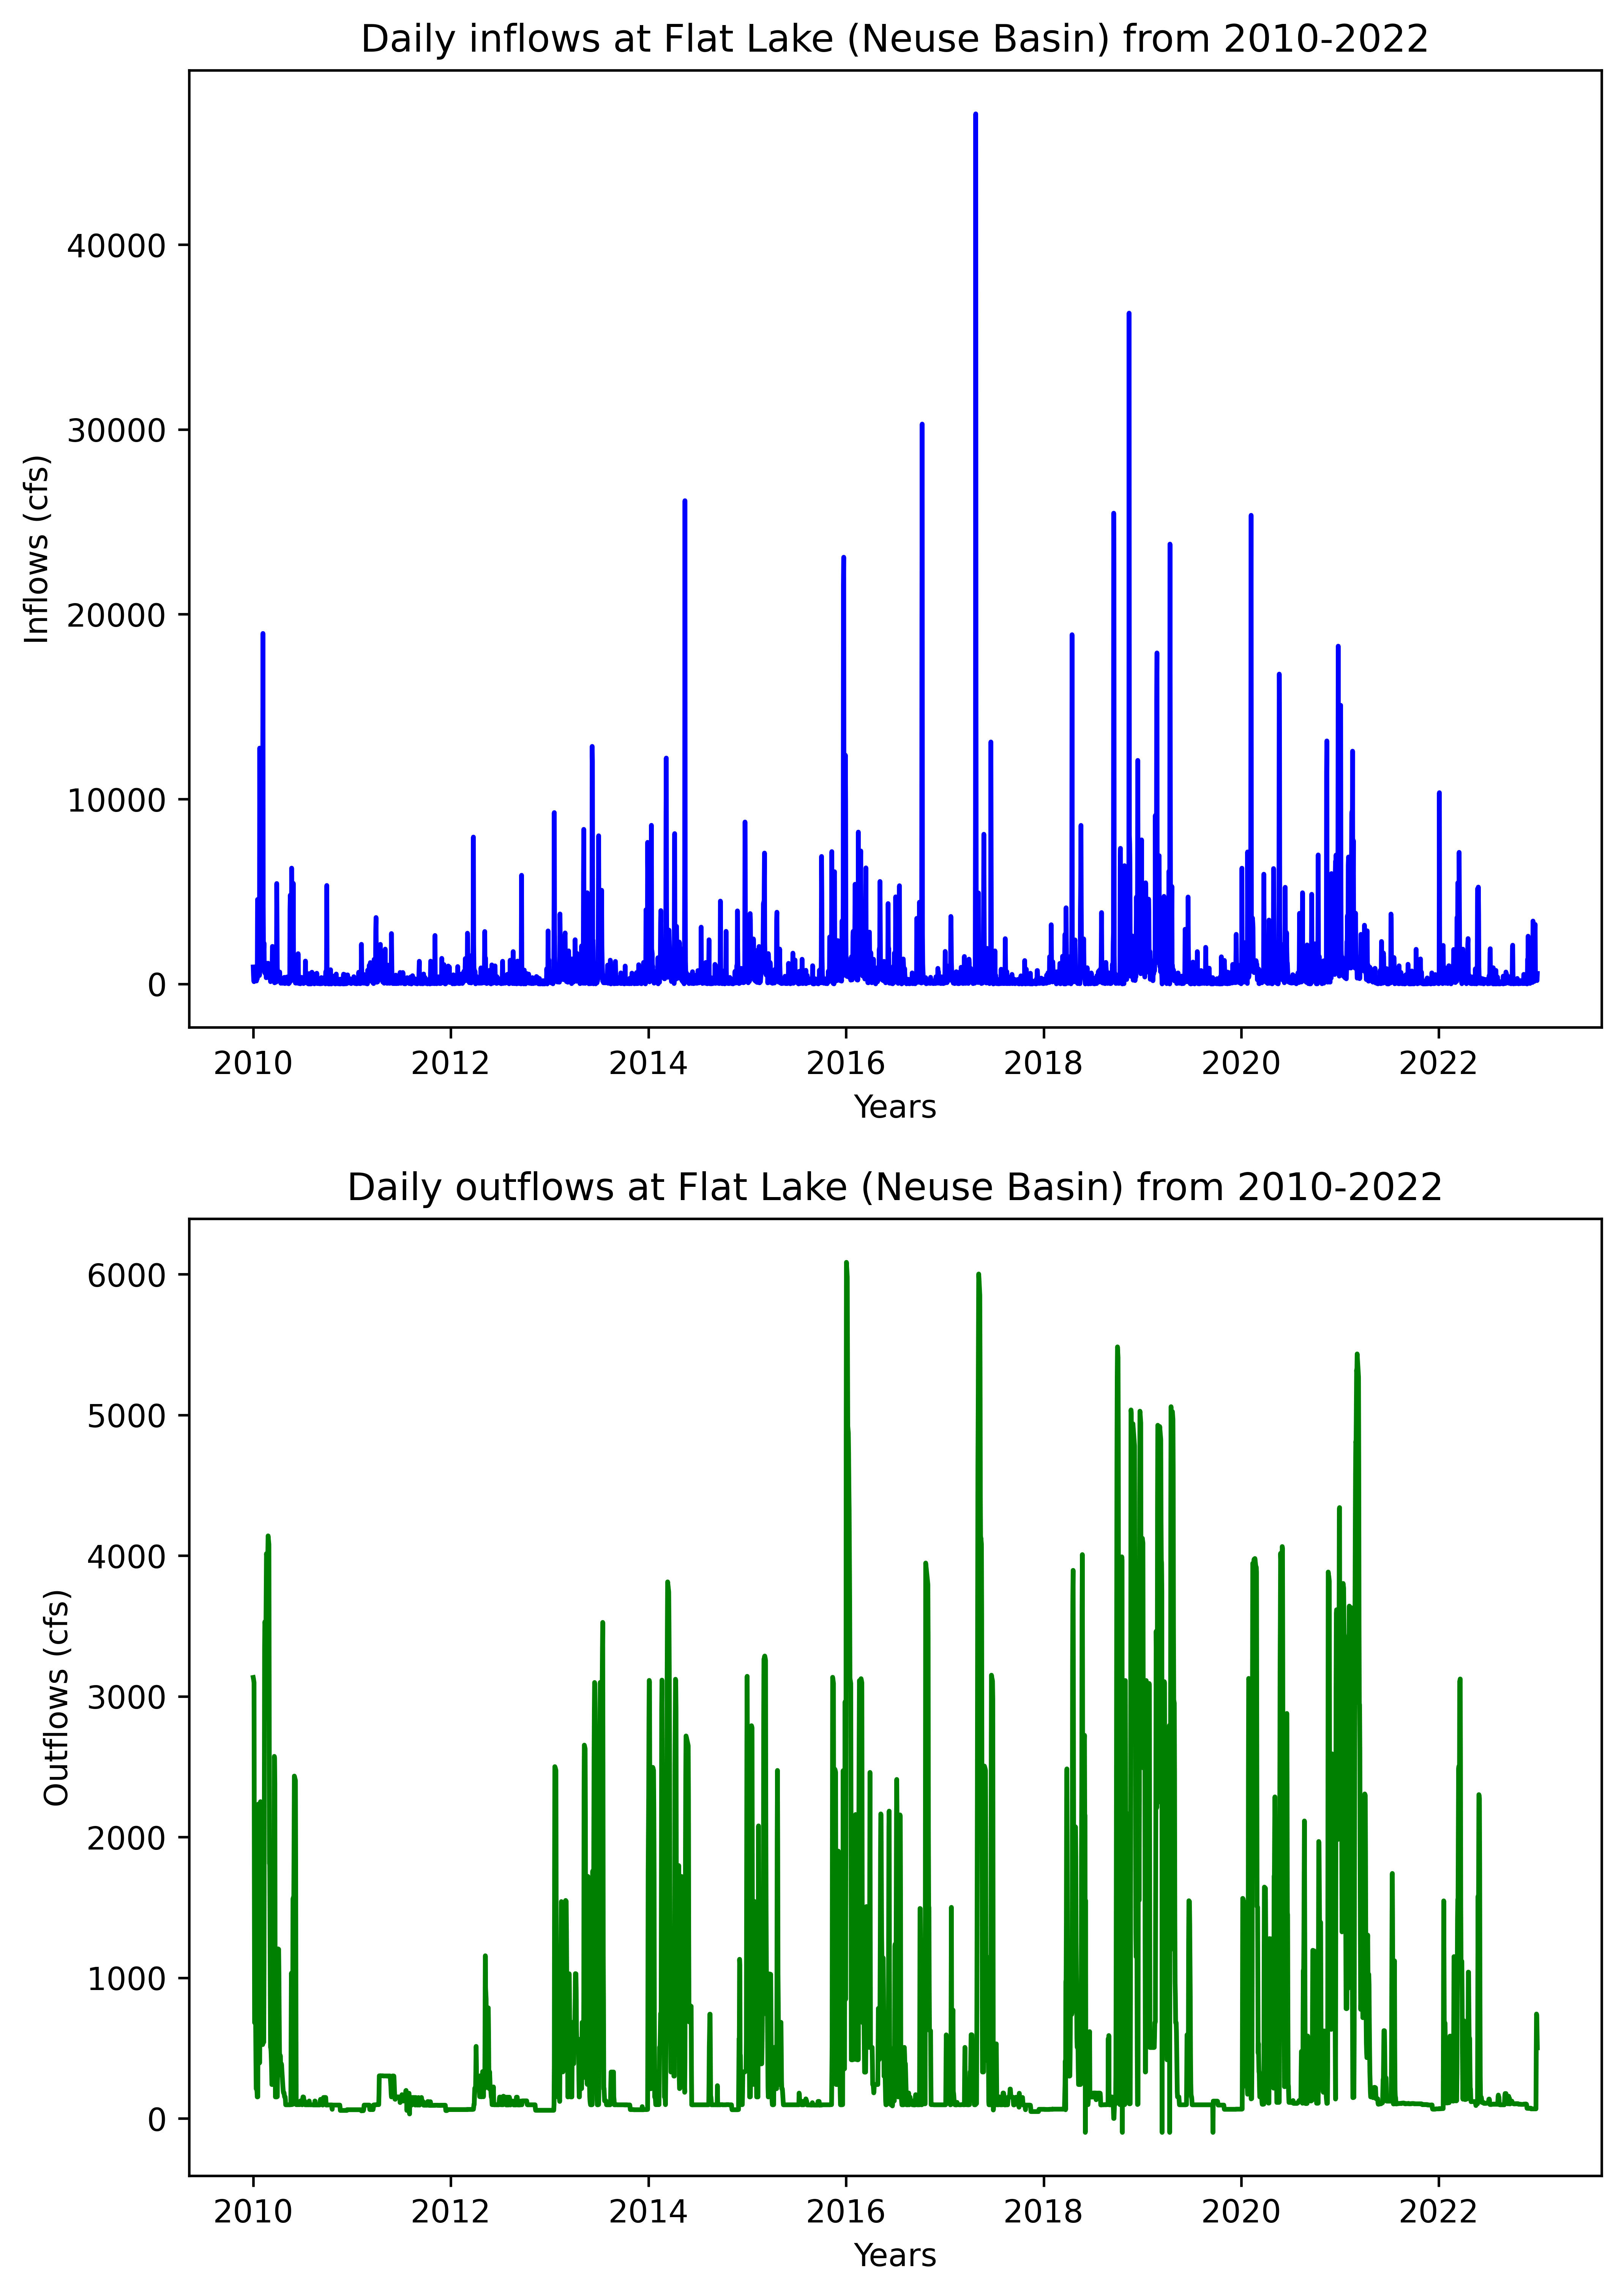

In [35]:
## Making a subplot
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Plot data on each subplot


axs[0].plot(Inflow, color ='blue')
axs[0].set_title('Daily inflows at Flat Lake (Neuse Basin) from 2010-2022')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Inflows (cfs)')

axs[1].plot(Outflow, color ='green')
axs[1].set_title('Daily outflows at Flat Lake (Neuse Basin) from 2010-2022')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Outflows (cfs)')